In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [375]:
data = pd.read_csv("/content/Restaurant_Reviews.tsv", sep = "\t")
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [376]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [377]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [378]:
data.shape

(1000, 2)

In [379]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


***DATA PREPROCESSING***

**Cleaning the data**

In [381]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


In [382]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [383]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [384]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

**MODEL BUILDING**

**KNN**

In [385]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [386]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier



In [387]:
best_accuracy = 0.0
n_neighbors = 0
for i in np.arange(1,16,1):
  temp_classifier = KNeighborsClassifier(n_neighbors= i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for K={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    n_neighbors = i
print('--------------------------------------------')
print('The best accuracy is {}% with K value as {}'.format(round(best_accuracy*100, 2), round(n_neighbors,1)))

Accuracy score for K=1 is: 62.0%
Accuracy score for K=2 is: 54.5%
Accuracy score for K=3 is: 66.5%
Accuracy score for K=4 is: 57.5%
Accuracy score for K=5 is: 58.5%
Accuracy score for K=6 is: 62.0%
Accuracy score for K=7 is: 62.0%
Accuracy score for K=8 is: 62.0%
Accuracy score for K=9 is: 63.5%
Accuracy score for K=10 is: 62.0%
Accuracy score for K=11 is: 64.0%
Accuracy score for K=12 is: 61.5%
Accuracy score for K=13 is: 62.5%
Accuracy score for K=14 is: 60.5%
Accuracy score for K=15 is: 61.5%
--------------------------------------------
The best accuracy is 66.5% with K value as 3


In [388]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [389]:
y_pred1= knn.predict(X_test)

In [390]:
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve,roc_auc_score,log_loss,precision_score,recall_score,f1_score
acc1 = accuracy_score(y_test,y_pred1)
acc1

0.665

In [391]:
confusion1 = confusion_matrix(y_test,y_pred1)
confusion1

array([[80, 17],
       [50, 53]])

Text(69.0, 0.5, 'Actual values')

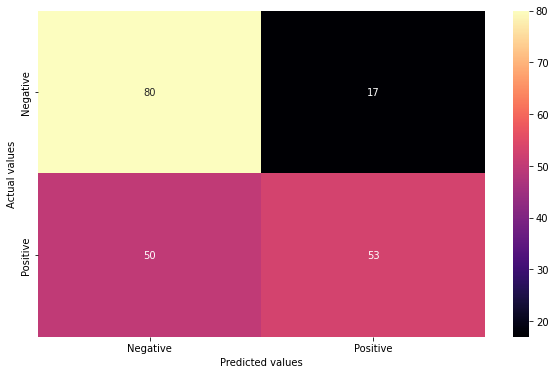

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(confusion1, annot=True, cmap="magma", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [393]:
print("Precision1:",precision_score(y_test,y_pred1))
print("Recall1:",recall_score(y_test,y_pred1))
print("F1 Score1:",f1_score(y_test,y_pred1))

Precision1: 0.7571428571428571
Recall1: 0.5145631067961165
F1 Score1: 0.6127167630057803


In [394]:
pred_prob = knn.predict_proba(X_test)
fpr1,tpr1,thresh1 = roc_curve(y_test,pred_prob[:,1],pos_label = 1)
auc_score1 = roc_auc_score(y_test,pred_prob[:,1])
print(auc_score1)

0.7035832249024121


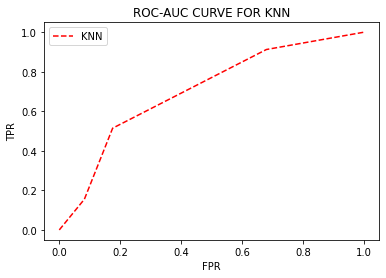

In [395]:
plt.plot(fpr1,tpr1,color = "red",linestyle = "--",label = "KNN")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR KNN")
plt.legend()
plt.show()

In [396]:
logloss1 = log_loss(y_test,y_pred1)
logloss1
                    

11.570558058076644

**NAIVE-BAYES**

In [397]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()

In [398]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
--------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [399]:
naive = MultinomialNB(alpha=0.2)
naive.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [400]:
y_pred2 =naive.predict(X_test)

In [401]:
acc2 = accuracy_score(y_test,y_pred2)
acc2


0.785

In [402]:
confusion2 = confusion_matrix(y_test,y_pred2)
confusion2

array([[73, 24],
       [19, 84]])

Text(69.0, 0.5, 'Actual values')

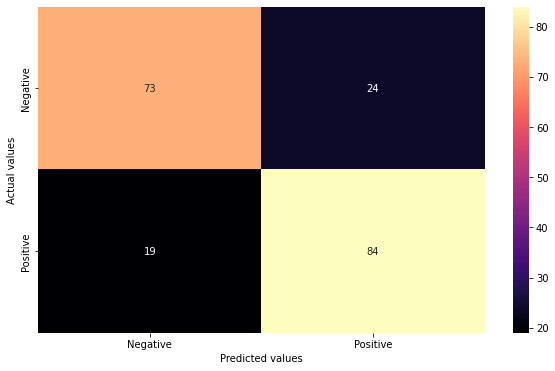

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(confusion2, annot=True, cmap="magma", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [404]:
print("Precision2:",precision_score(y_test,y_pred2))
print("Recall2:",recall_score(y_test,y_pred2))
print("F1 Score2:",f1_score(y_test,y_pred2))

Precision2: 0.7777777777777778
Recall2: 0.8155339805825242
F1 Score2: 0.7962085308056872


In [405]:
pred_prob = naive.predict_proba(X_test)
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_prob[:,1],pos_label = 1)
auc_score2 = roc_auc_score(y_test,pred_prob[:,1])
print(auc_score2)

0.861525372835552


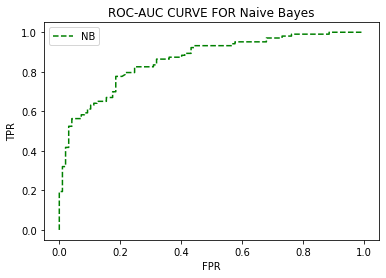

In [430]:
plt.plot(fpr2,tpr2,color = "green",linestyle = "--",label = "NB")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR Naive Bayes")
plt.legend()
plt.show()

In [407]:
logloss2 = log_loss(y_test,y_pred2)
logloss2

7.42593287659742

LOGISTIC REGRESSION

In [408]:
from sklearn.linear_model import LogisticRegression


In [409]:
best_accuracy = 0.0
C_val = 0.0
for i in np.arange(0.1,1.5,0.1):
  temp_classifier = LogisticRegression(penalty='l2',dual=False, tol=0.0001, C= i, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    C_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(C_val,1)))

Accuracy score for C=0.1 is: 74.0%
Accuracy score for C=0.2 is: 74.0%
Accuracy score for C=0.3 is: 73.0%
Accuracy score for C=0.4 is: 71.5%
Accuracy score for C=0.5 is: 72.0%
Accuracy score for C=0.6 is: 72.0%
Accuracy score for C=0.7 is: 71.0%
Accuracy score for C=0.8 is: 71.0%
Accuracy score for C=0.9 is: 71.0%
Accuracy score for C=1.0 is: 71.0%
Accuracy score for C=1.1 is: 71.0%
Accuracy score for C=1.2 is: 71.0%
Accuracy score for C=1.3 is: 71.0%
Accuracy score for C=1.4 is: 71.0%
--------------------------------------------
The best accuracy is 74.0% with C value as 0.1


In [410]:
logis = LogisticRegression(penalty='l2',dual=False, tol=0.0001, C= 0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
logis.fit(X_train,y_train)


LogisticRegression(C=0.1)

In [411]:
y_pred3 = logis.predict(X_test)

In [412]:
acc3 = accuracy_score(y_test,y_pred3)
acc3


0.74

In [413]:
confusion3= confusion_matrix(y_test,y_pred3)
confusion3

array([[86, 11],
       [41, 62]])

Text(69.0, 0.5, 'Actual values')

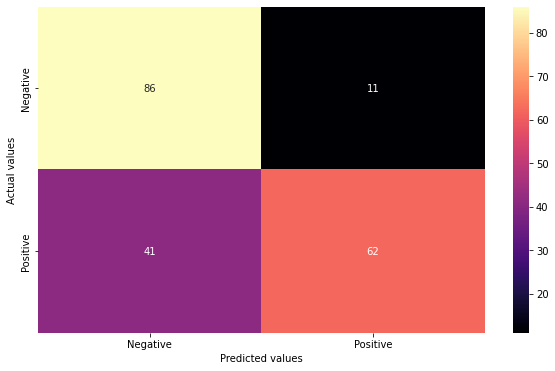

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(confusion3, annot=True, cmap="magma", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [415]:
print("Precision3:",precision_score(y_test,y_pred3))
print("Recall3:",recall_score(y_test,y_pred3))
print("F1 Score3:",f1_score(y_test,y_pred3))

Precision3: 0.8493150684931506
Recall3: 0.6019417475728155
F1 Score3: 0.7045454545454545


In [416]:
pred_prob = logis.predict_proba(X_test)
fpr3,tpr3,thresh3 = roc_curve(y_test,pred_prob[:,1],pos_label = 1)
auc_score3 = roc_auc_score(y_test,pred_prob[:,1])
print(auc_score3)

0.8296466820138124


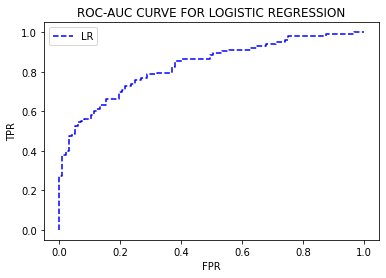

In [431]:
plt.plot(fpr3,tpr3,color = "blue",linestyle = "--",label = "LR")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR LOGISTIC REGRESSION")
plt.legend()
plt.show()

In [418]:
logloss3 = log_loss(y_test,y_pred3)
logloss3

8.980125840535438

SUPPORT VECTOR MACHINE

In [419]:
from sklearn.svm import SVC


In [420]:
best_accuracy = 0.0
C_val = 0.0
for i in np.arange(0.1,1.5,0.1):
  temp_classifier = SVC(C = i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    C_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(C_val,1)))

Accuracy score for C=0.1 is: 49.5%
Accuracy score for C=0.2 is: 56.0%
Accuracy score for C=0.3 is: 63.0%
Accuracy score for C=0.4 is: 66.5%
Accuracy score for C=0.5 is: 67.5%
Accuracy score for C=0.6 is: 68.5%
Accuracy score for C=0.7 is: 69.5%
Accuracy score for C=0.8 is: 70.0%
Accuracy score for C=0.9 is: 72.0%
Accuracy score for C=1.0 is: 73.5%
Accuracy score for C=1.1 is: 74.5%
Accuracy score for C=1.2 is: 75.0%
Accuracy score for C=1.3 is: 75.0%
Accuracy score for C=1.4 is: 75.0%
--------------------------------------------
The best accuracy is 75.0% with C value as 1.2


In [421]:
support = SVC(C = 1.2,probability=True)
support.fit(X_train,y_train)

SVC(C=1.2, probability=True)

In [422]:
y_pred4 = support.predict(X_test)

In [423]:
acc4 = accuracy_score(y_test,y_pred4)
acc4

0.75

In [424]:
confusion4 = confusion_matrix(y_test,y_pred4)
confusion4

array([[88,  9],
       [41, 62]])

Text(69.0, 0.5, 'Actual values')

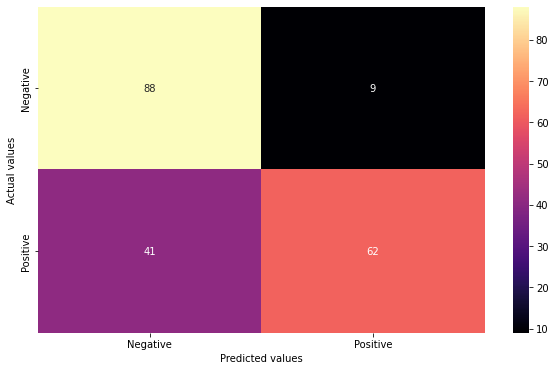

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(confusion4, annot=True, cmap="magma", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [426]:
print("Precision4:",precision_score(y_test,y_pred4))
print("Recall4:",recall_score(y_test,y_pred4))
print("F1 Score4:",f1_score(y_test,y_pred4))

Precision4: 0.8732394366197183
Recall4: 0.6019417475728155
F1 Score4: 0.7126436781609194


In [427]:
pred_prob = support.predict_proba(X_test)
fpr4,tpr4,thresh4 = roc_curve(y_test,pred_prob[:,1],pos_label = 1)
auc_score4 = roc_auc_score(y_test,pred_prob[:,1])
print(auc_score4)

0.8356520868781904


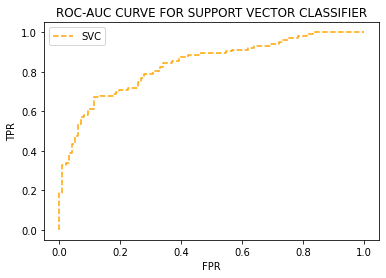

In [432]:
plt.plot(fpr4,tpr4,color = "orange",linestyle = "--",label = "SVC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR SUPPORT VECTOR CLASSIFIER")
plt.legend()
plt.show()

In [429]:
logloss4 = log_loss(y_test,y_pred4)
logloss4

8.634730080612028

DECISION TREE

In [447]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [451]:
best_accuracy = 0.0
depth = 2
for i in np.arange(2,20,1):
  temp_classifier = DecisionTreeClassifier(max_depth = i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for depth={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    depth = i
print('--------------------------------------------')
print('The best accuracy is {}% with depth value as {}'.format(round(best_accuracy*100, 2), round(depth,1)))



Accuracy score for depth=2 is: 59.0%
Accuracy score for depth=3 is: 60.0%
Accuracy score for depth=4 is: 61.5%
Accuracy score for depth=5 is: 63.0%
Accuracy score for depth=6 is: 64.5%
Accuracy score for depth=7 is: 66.0%
Accuracy score for depth=8 is: 67.5%
Accuracy score for depth=9 is: 68.0%
Accuracy score for depth=10 is: 69.0%
Accuracy score for depth=11 is: 69.0%
Accuracy score for depth=12 is: 69.0%
Accuracy score for depth=13 is: 70.5%
Accuracy score for depth=14 is: 71.0%
Accuracy score for depth=15 is: 71.0%
Accuracy score for depth=16 is: 71.5%
Accuracy score for depth=17 is: 71.5%
Accuracy score for depth=18 is: 71.5%
Accuracy score for depth=19 is: 71.5%
--------------------------------------------
The best accuracy is 71.5% with depth value as 16


In [453]:
tree =  DecisionTreeClassifier(max_depth = 16)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=16)

In [454]:
y_pred5 = tree.predict(X_test)

In [455]:
acc5 = accuracy_score(y_test,y_pred5)
acc5

0.705

In [456]:
confusion5 = confusion_matrix(y_test,y_pred5)
confusion5

array([[92,  5],
       [54, 49]])

Text(69.0, 0.5, 'Actual values')

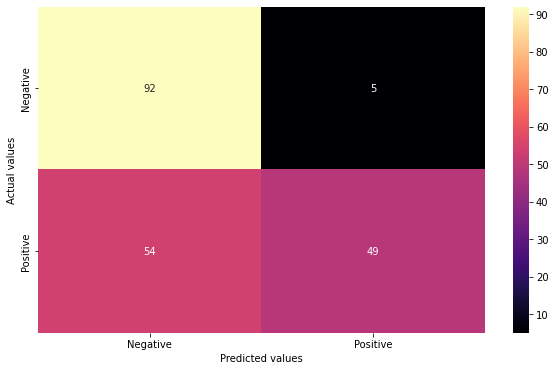

In [458]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(confusion5, annot=True, cmap="magma", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [459]:
print("Precision5:",precision_score(y_test,y_pred5))
print("Recall5:",recall_score(y_test,y_pred5))
print("F1 Score5:",f1_score(y_test,y_pred5))

Precision5: 0.9074074074074074
Recall5: 0.47572815533980584
F1 Score5: 0.6242038216560509


In [460]:
pred_prob = tree.predict_proba(X_test)
fpr5,tpr5,thresh5 = roc_curve(y_test,pred_prob[:,1],pos_label = 1)
auc_score5 = roc_auc_score(y_test,pred_prob[:,1])
print(auc_score5)

0.7122910619557601


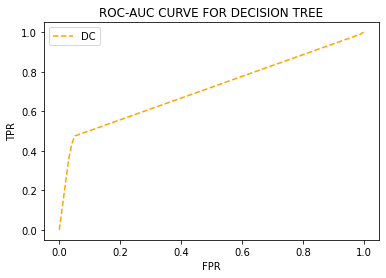

In [461]:
plt.plot(fpr5,tpr5,color = "orange",linestyle = "--",label = "DT")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR DECISION TREE")
plt.legend()
plt.show()

In [462]:
logloss5 = log_loss(y_test,y_pred5)
logloss5

10.188959026434407

RANDOM FOREST

In [467]:
#source code: https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning/notebook
n_estimators = [5,20,50,100]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [468]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [469]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [470]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}  



In [474]:
forest = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=100, min_samples_split=6, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_split=6,
                       n_estimators=20)

In [475]:
y_pred6 = forest.predict(X_test)

In [476]:
acc6 = accuracy_score(y_test,y_pred6)
acc6

0.72

In [477]:
confusion6 = confusion_matrix(y_test,y_pred6)
confusion6

array([[89,  8],
       [48, 55]])

Text(69.0, 0.5, 'Actual values')

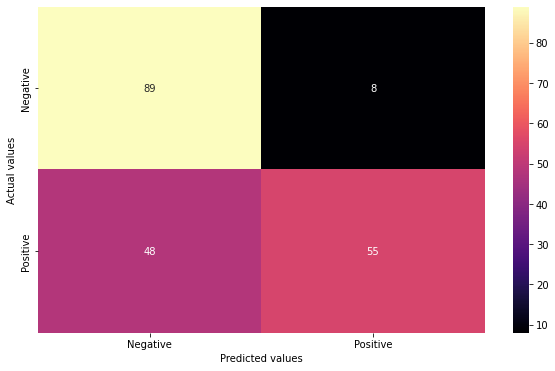

In [478]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(confusion6, annot=True, cmap="magma", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [479]:
print("Precision6:",precision_score(y_test,y_pred6))
print("Recall6:",recall_score(y_test,y_pred6))
print("F1 Score6:",f1_score(y_test,y_pred6))

Precision6: 0.873015873015873
Recall6: 0.5339805825242718
F1 Score6: 0.6626506024096386


In [480]:
pred_prob = tree.predict_proba(X_test)
fpr6,tpr6,thresh6 = roc_curve(y_test,pred_prob[:,1],pos_label = 1)
auc_score6 = roc_auc_score(y_test,pred_prob[:,1])
print(auc_score6)

0.7122910619557601


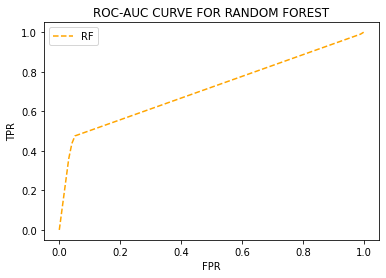

In [481]:
plt.plot(fpr6,tpr6,color = "orange",linestyle = "--",label = "RF")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR RANDOM FOREST")
plt.legend()
plt.show()

In [482]:
logloss6 = log_loss(y_test,y_pred6)
logloss6

9.6708893744722

SUMMARISING THE RESULTS

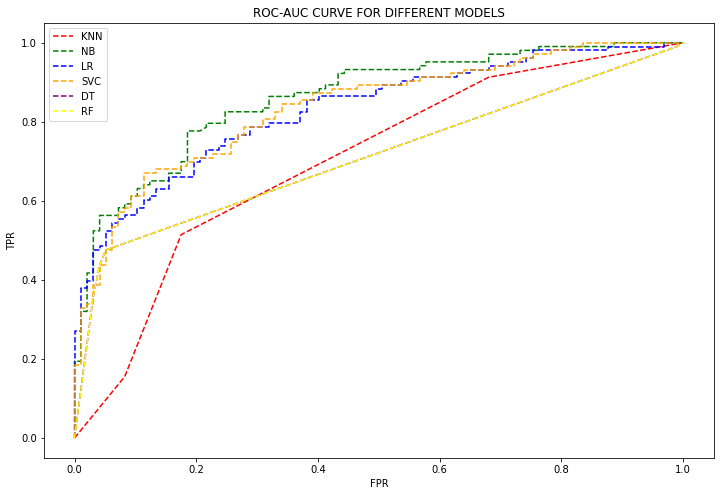

In [487]:
plt.figure(figsize = (12,8))
plt.plot(fpr1,tpr1,color = "red",linestyle = "--",label = "KNN")
plt.plot(fpr2,tpr2,color = "green",linestyle = "--",label = "NB")
plt.plot(fpr3,tpr3,color = "blue",linestyle = "--",label = "LR")
plt.plot(fpr4,tpr4,color = "orange",linestyle = "--",label = "SVC")
plt.plot(fpr5,tpr5,color = "purple",linestyle = "--",label = "DT")
plt.plot(fpr6,tpr6,color = "yellow",linestyle = "--",label = "RF")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC CURVE FOR DIFFERENT MODELS")
plt.legend(loc=0)
plt.show()

**OBSERVATION:**

Naive Bayes has the highest ROC-AUC value when compared to other models.

<function matplotlib.pyplot.show>

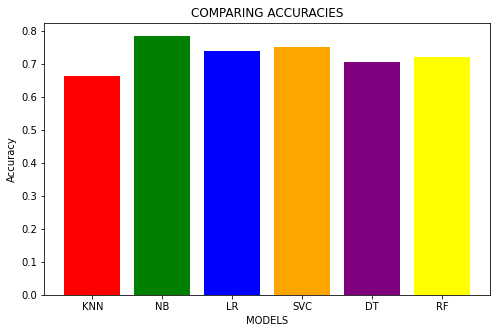

In [494]:
plt.figure(figsize = (8,5))
accuracy = [acc1,acc2,acc3,acc4,acc5,acc6]
models = ["KNN","NB","LR","SVC","DT","RF"]
color = ["red","green","blue","orange","purple","yellow"]
plt.bar(models,accuracy,color = color)
plt.xlabel("MODELS")
plt.ylabel("Accuracy")
plt.title("COMPARING ACCURACIES")
plt.show

**OBSERVATION:**

Naive Bayes has the highest accuracy score compared to other models

FINAL CONCLUSION:

Naive Bayes is the best algorithm when compared to other models for restaurant review sentiment analysis

**PREDICTION USING NAIVE BAYES**

In [497]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return naive.predict(temp)

In [498]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [499]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [500]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [504]:
sample_review = 'The food was absolutely awful, from preparation to presentation , very bad.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!
